<a href="https://colab.research.google.com/github/AryaGupta05/FlowersClassificationCNN_MOBILENETV2_MODEL-DEEP-LEARNING-/blob/main/FlowersClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import files
uploaded = files.upload()   # Upload your flowers.zip file


Saving archive (2).zip to archive (2).zip


In [ ]:
!unzip "archive (2).zip" -d dataset


Archive:  archive (2).zip
  inflating: dataset/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: dataset/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: dataset/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: dataset/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: dataset/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: dataset/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: dataset/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: dataset/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: dataset/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: dataset/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: dataset/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: dataset/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: dataset/flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: dataset/flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: dataset/flowers/daisy/10555749515_13a12a026e.jpg  
  inf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 180
batch_size = 32

data_path = "dataset/flowers/"   # ✔ Correct path

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.3104 - loss: 1.6861 - val_accuracy: 0.5349 - val_loss: 1.2103
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5882 - loss: 1.0477 - val_accuracy: 0.6186 - val_loss: 0.9963
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.6833 - loss: 0.8476 - val_accuracy: 0.6605 - val_loss: 0.9551
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.7554 - loss: 0.6509 - val_accuracy: 0.6267 - val_loss: 1.0195
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8206 - loss: 0.4888 - val_accuracy: 0.6616 - val_loss: 1.0008
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.8928 - loss: 0.2969 - val_accuracy: 0.6453 - val_loss: 1.1841
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9140 - loss: 0.2569 - val_accuracy: 0.6407 - val_loss: 1.4634
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9706 - loss: 0.1061 - val_accuracy: 0.6

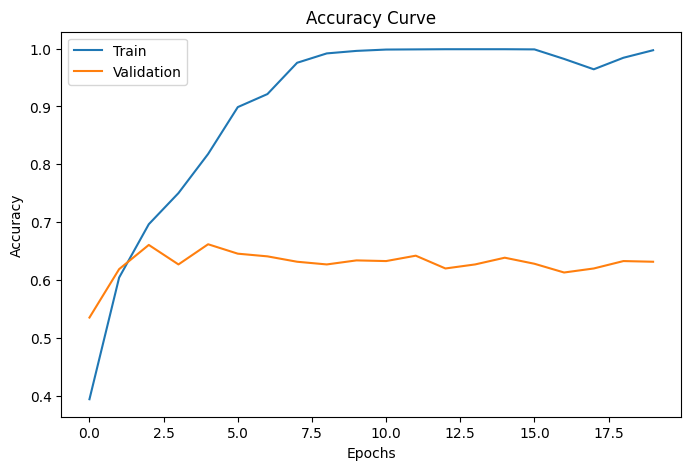

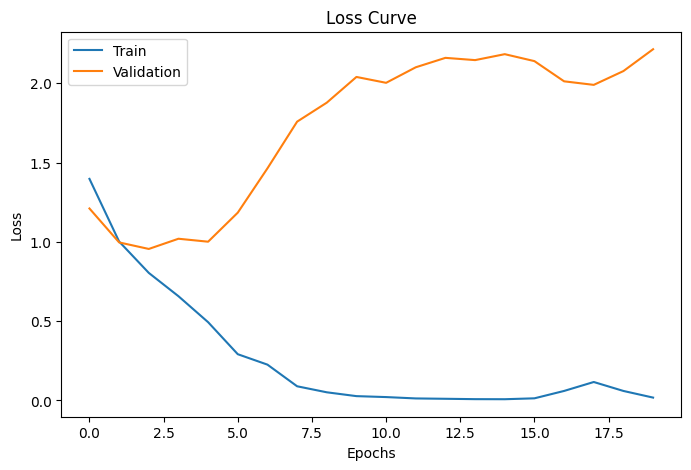

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, models

img_size = 180

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

base_model.trainable = False  # Freeze base model


/tmp/ipython-input-374428363.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
data_path = "dataset/flowers/"

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # IMPORTANT
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 320ms/step - accuracy: 0.6451 - loss: 0.9414 - val_accuracy: 0.8523 - val_loss: 0.4141
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.8716 - loss: 0.3631 - val_accuracy: 0.8721 - val_loss: 0.3495
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9006 - loss: 0.2669 - val_accuracy: 0.8605 - val_loss: 0.3792
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9270 - loss: 0.2041 - val_accuracy: 0.8767 - val_loss: 0.3676
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9462 - loss: 0.1619 - val_accuracy: 0.8709 - val_loss: 0.3629
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9593 - loss: 0.1254 - val_accuracy: 0.8663 - val_loss: 0.4011
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9714 - loss: 0.1041 - val_accuracy: 0.8558 - val_loss: 0.3922
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9782 - loss: 0.0816 - val_ac

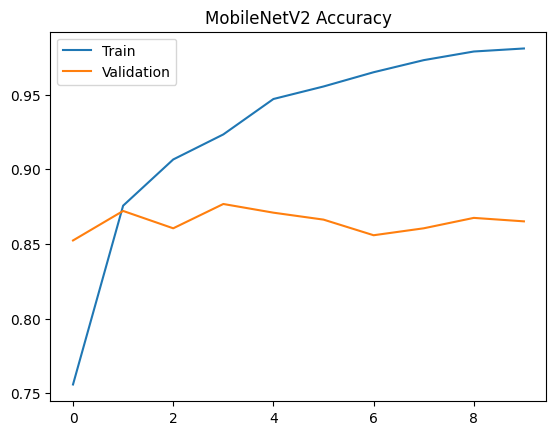

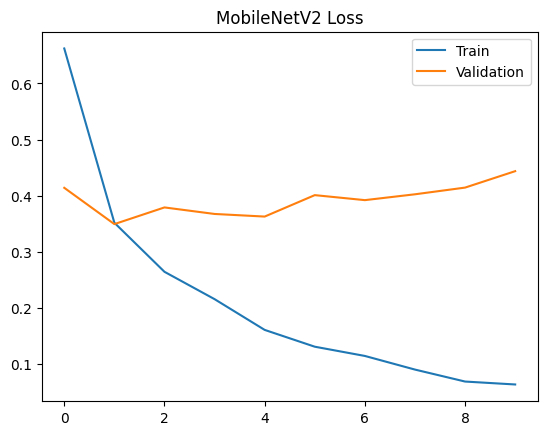

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("MobileNetV2 Accuracy")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("MobileNetV2 Loss")
plt.legend(["Train","Validation"])
plt.show()


In [ ]:
model.save("mobilenet_flower_model.h5")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

labels = ['daisy','dandelion','rose','sunflower','tulip']

def predict_image(path):
    img = image.load_img(path, target_size=(img_size, img_size))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)
    print("Prediction:", labels[np.argmax(pred)])


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 674407101_57676c40fb.jpg to 674407101_57676c40fb.jpg


In [ ]:
predict_image("/content/674407101_57676c40fb.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction: dandelion
